In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/CleanedAirQuality.csv")
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [6]:
df.shape

(9357, 15)

# Show Data Types

In [7]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

# Find Missing Values

In [8]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

## Date change object to datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10


In [12]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Year                      int32
Month                     int32
Day                       int32
dtype: object

In [13]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004.240141,6.310356,15.876884
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004.000000,1.000000,1.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004.000000,3.000000,8.000000
50%,2004-09-21 00:00:00,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004.000000,6.000000,16.000000
75%,2004-12-28 00:00:00,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004.000000,9.000000,23.000000
max,2005-04-04 00:00:00,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000,12.000000,31.000000
std,NaN,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,0.427192,3.438160,8.808653


## Converting Time Column

In [22]:
df['Time'] = pd.to_datetime(df["Time"],format='%H:%M:%S', errors='coerce').dt.time

# Taking out hour from the time 
df["Hour"] = df["Time"].apply(lambda x: x.hour)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,18
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,19
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,20
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,21
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,22


## Calculate the Pollutant values of the mean , median and standard deviation

In [15]:
# mean of CO(GT)
mean_co = np.mean(df['CO(GT)'])
print(f'Mean of CO(GT):{mean_co}')

# median of CO(GT)
median_co = np.mean(df['CO(GT)'])
print(f'Median of CO(GT):{median_co}')

# standard deviation of CO(GT)
std_co = np.std(df['CO(GT)'])
print(f'Standard Deviation of CO(GT):{std_co}')

Mean of CO(GT):-34.207523778989
Median of CO(GT):-34.207523778989
Standard Deviation of CO(GT):77.65302055280891


In [16]:
# mean of NOx(GT)
mean_NOx = np.mean(df['NOx(GT)'])
print(f'Mean of NOx(GT):{mean_NOx}')

# median of NOx(GT)
median_NOx = np.mean(df['NOx(GT)'])
print(f'Median of NOx(GT):{median_NOx}')

# standard deviation of NOx(GT)
std_NOx = np.std(df['NOx(GT)'])
print(f'Standard Deviation of NOx(GT):{std_NOx}')

Mean of NOx(GT):168.6169712514695
Median of NOx(GT):168.6169712514695
Standard Deviation of NOx(GT):257.4201097053756


In [17]:
# mean of C6H6(GT)
mean_C6H6 = np.mean(df['C6H6(GT)'])
print(f'Mean of C6H6(GT):{mean_C6H6}')

# median of C6H6(GT)
median_C6H6 = np.mean(df['C6H6(GT)'])
print(f'Median of C6H6(GT):{median_C6H6}')

# standard deviation of C6H6(GT)
std_C6H6 = np.std(df['C6H6(GT)'])
print(f'Standard Deviation of C6H6(GT):{std_C6H6}')

Mean of C6H6(GT):1.8656834455487863
Median of C6H6(GT):1.8656834455487863
Standard Deviation of C6H6(GT):41.37799518739091


# Data Visualization

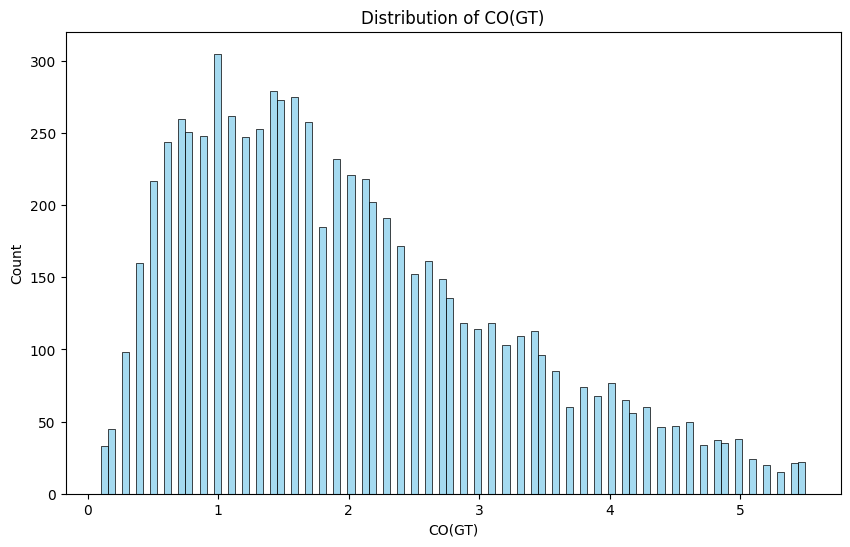

In [29]:
# Remove outliers using IQR for the 'CO(GT)' column
Q1 = df['CO(GT)'].quantile(0.25) 
Q3 = df['CO(GT)'].quantile(0.75) 

IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter the data
filtered_df = df[(df['CO(GT)'] > lower_bound) & (df['CO(GT)'] < upper_bound)]


# Crate histplot with CO(GT)
plt.figure(figsize=(10,6))
sns.histplot(filtered_df['CO(GT)'], color='skyblue', edgecolor='black', bins=100)
plt.title('Distribution of CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Count')
plt.show()

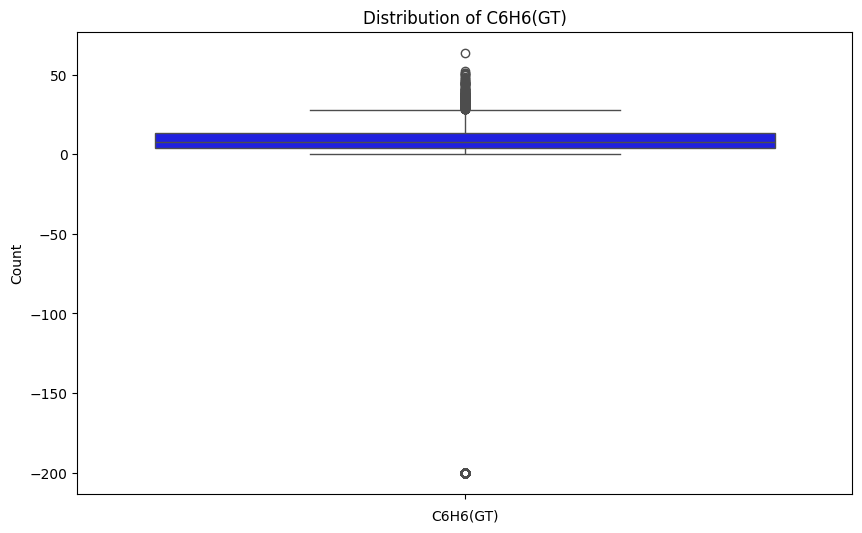

In [19]:
# Crate Histplot with C6H6(GT)
plt.figure(figsize=(10,6))
sns.boxplot(df['C6H6(GT)'], color='blue')
plt.title('Distribution of C6H6(GT)')
plt.xlabel('C6H6(GT)')
plt.ylabel('Count')
plt.show()

## Time-Series Trends of Major Pollutants

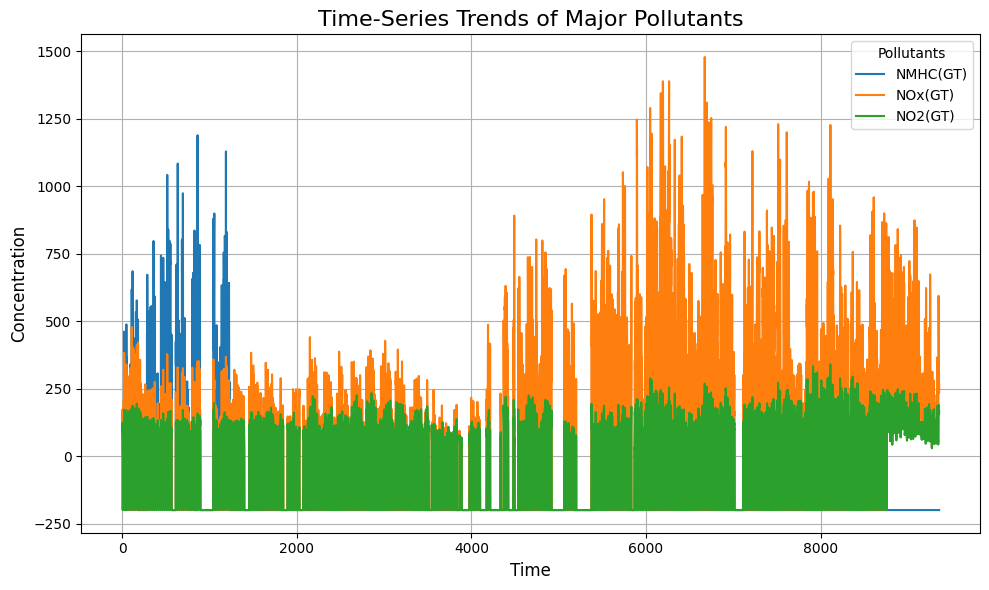

In [40]:
# List of major pollutants to plot
pollutants = [ 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']
# df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'])
# df.set_index('Datetime', inplace=True)
# Plot each pollutant's trend over time
plt.figure(figsize=(10,6))

for pollutant in pollutants:
    plt.plot(df.index, df[pollutant], label=pollutant)

plt.title('Time-Series Trends of Major Pollutants', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.legend(title='Pollutants', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()